In [1]:
# Import package
import STMiner
from STMiner.SPFinder import SPFinder

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [6]:
# Load data
h5ad_file_path = "/mnt/c/Users/Lefteris/Downloads/STMiner_test/STMiner-test-data-main/10X_Visium_hunter2021spatially_sample_C_data.h5ad"
sp = SPFinder()
sp.read_h5ad(file=h5ad_file_path, bin_size=1)

In [7]:
sp.adata

AnnData object with n_obs × n_vars = 2677 × 32268
    obs: 'col_0', 'leiden', 'x', 'y'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_pixel', 'spatial_real'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [8]:
# Find SVGs
sp.get_genes_csr_array(min_cells=200, log1p=False)
sp.spatial_high_variable_genes(thread=6)

Parsing distance array...: 100%|██████████| 6262/6262 [01:03<00:00, 98.14it/s] 

Using multiprocessing, thread is 6.


In [ ]:
# Check spatial variation of genes
sp.global_distance

# The 'Gene' column is the gene name, and the 'Distance' column is the difference between the spatial distribution of the gene and the background.
# A larger difference indicates a more pronounced spatial pattern of the gene.

# For this reason we will be selecting the first 2000 genes at the next step

,Gene,Distance,z-score
663,myha,3326.462021,3.007266
1203,pvalb1,2408.881112,2.707314
49,zgc:101560,2372.137007,2.693030
1635,vmhcl,2353.136979,2.685556
4111,pvalb2,2335.063187,2.678391
...,...,...,...
6050,rpl32,4.303895,-2.981415
6076,rsl24d1,3.970540,-3.041764
670,rpl12,3.676688,-3.098419
488,rpl13,3.632065,-3.107332


In [ ]:
# Fit a GMM
sp.fit_pattern(n_comp=20, gene_list=list(sp.global_distance[:2000]['Gene']))

Fitting GMM...: 100%|██████████| 2000/2000 [04:34<00:00,  7.29it/s] 


Building distance array...: 100%|██████████| 2000/2000 [1:14:52<00:00,  2.25s/it]


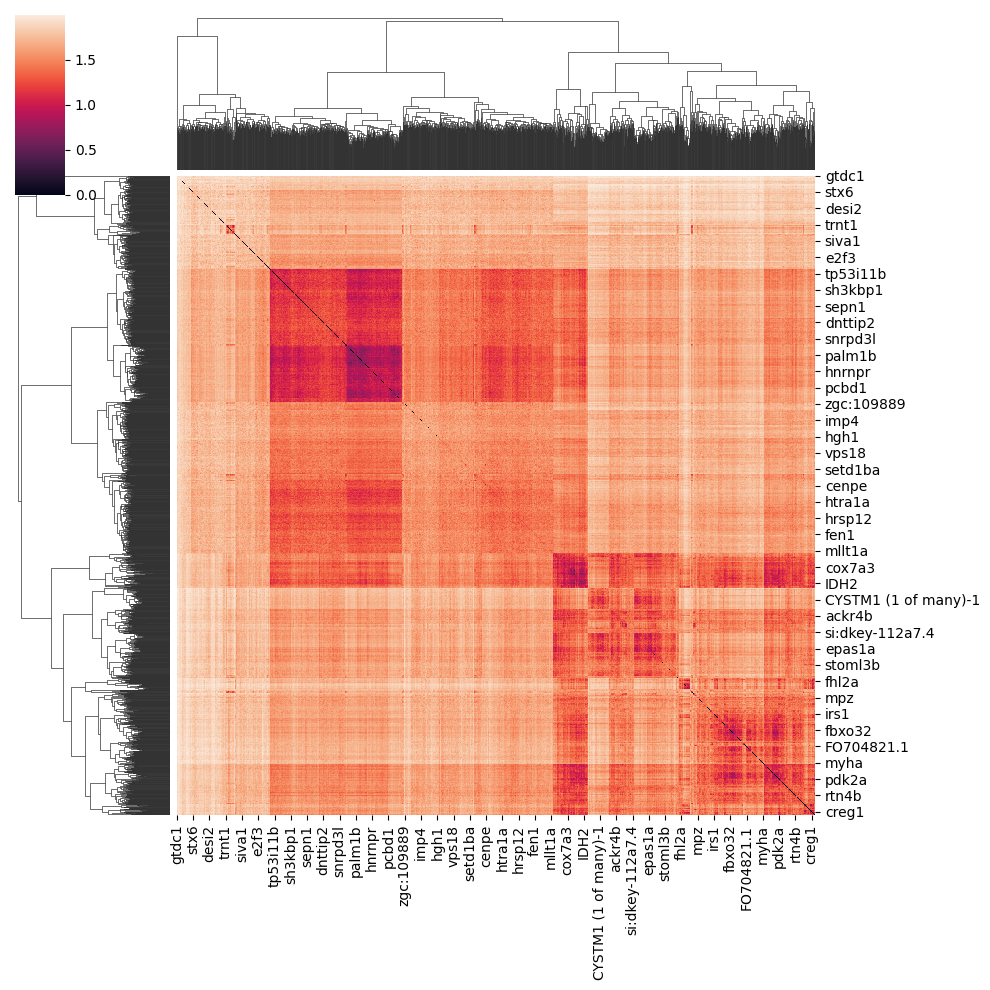

In [11]:
# Build distance array
# This step calculates the distance between genes' spatial distributions.
sp.build_distance_array()

# Visualise
import seaborn as sns
sns.clustermap(sp.genes_distance_array)


In [12]:
# Dimensionality reduction and clustering.
sp.cluster_gene(n_clusters=6, mds_components=20)

In [13]:
# The result is stored in genes_labels:
sp.genes_labels

,gene_id,labels
0,myha,3
1,pvalb1,3
2,zgc:101560,1
3,vmhcl,1
4,pvalb2,3
...,...,...
1995,rrp1,0
1996,ubxn7,4
1997,nubp2,0
1998,ift46,5


In [14]:
# Finding gene sets with interested structure

## Get patterns of interested gene/gene set:
interested_genes = ["mbpa", "BX957331.1", "madd"]
sp.get_pattern_of_given_genes(gene_list=interested_genes, n_comp=10)

Accumulating gene expression...: 100%|██████████| 3/3 [00:00<00:00, 60.78it/s]


In [15]:
# Compare the distance between all genes and the given gene set

from STMiner.Algorithm.distance import compare_gmm_distance

df = compare_gmm_distance(sp.custom_pattern, sp.patterns)
df.to_csv('compare_distance.csv')
df

# A lower distance indicates that the spatial expression pattern of the gene is more similar to that of the gene set of interest.

Comparing distance...: 100%|██████████| 2000/2000 [00:01<00:00, 1854.41it/s]


,0
BX957331.1,0.730894
tmem59l,0.803592
atp1a3b,0.832647
mbpa,0.867567
cd59,0.869458
...,...
si:dkey-30c15.10,1.580528
nipal4,1.581692
kcnh6a,1.600885
si:zfos-2372e4.1,1.606303


Accumulating gene expression...: 100%|██████████| 203/203 [00:02<00:00, 84.23it/s]


IndexError: cannot do a non-empty take from an empty axes.

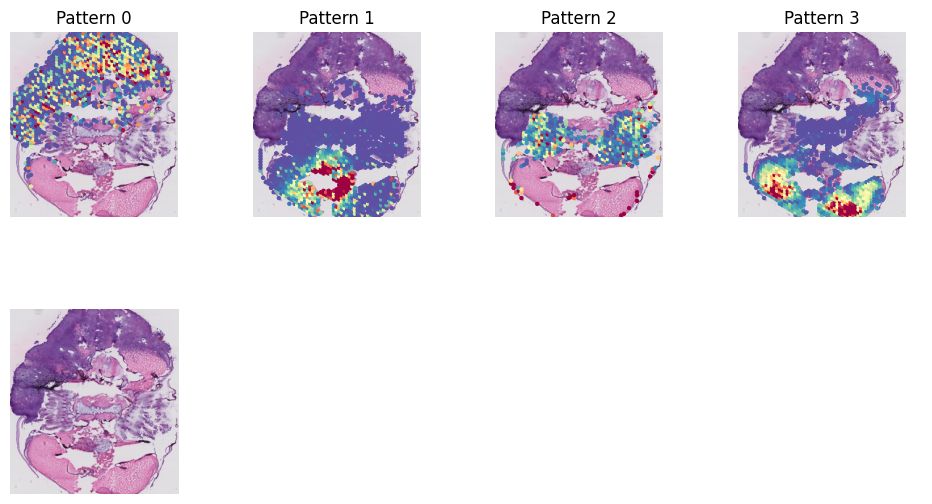

In [16]:
# To visualize the patterns:

# Note: A image path for image_path is needed if you want to show background image. 
# In this example, you can download the processed image here. Anyway, image_path is optional, not providing background images has no impact on the calculation results.
image_path="/mnt/c/Users/Lefteris/Downloads/STMiner_test/STMiner-test-data-main/demo_img.png"
sp.get_pattern_array(vote_rate=0.2, mode='vote')
sp.plot.plot_pattern(heatmap=False,
                     s=10,
                     rotate=False,
                     reverse_y=True,
                     reverse_x=True,
                     vmax=95,
                     image_path=image_path,
                     cmap="Spectral_r",
                     aspect=.55)

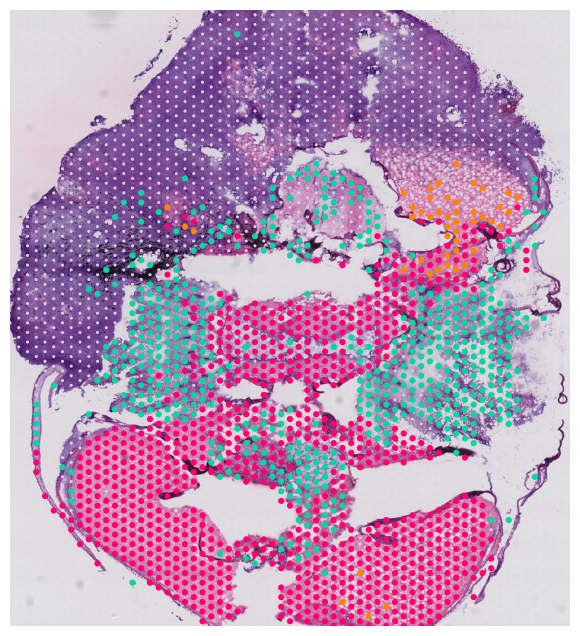

In [19]:
# Visualize the intersections between patterns 3 & 1:

sp.plot.plot_intersection(pattern_list=[1, 3],
                          image_path=image_path,
                          reverse_y=True,
                          reverse_x=True,
                          aspect=0.55,
                          s=20)

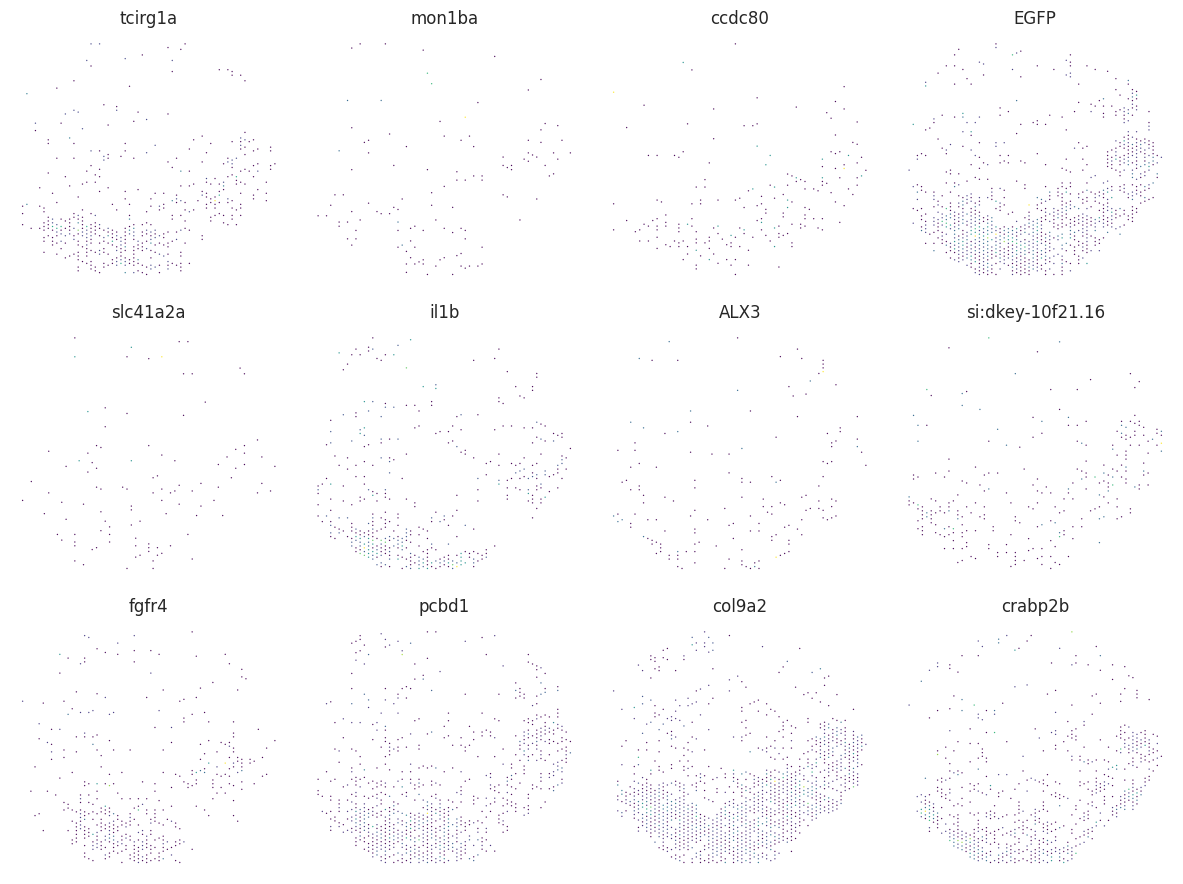

In [20]:
# To visualize the gene expression by labels:

sp.plot.plot_genes(label=0, vmax=99)